## Math 150: discussion 1

In [4]:
from numpy import cos, sin, exp
import numpy 
import numpy as np
from matplotlib.pyplot import plot as plt
import matplotlib
%matplotlib inline 

# Exercise 1: bisection method

In [7]:
f= lambda x: (2*x**3 + 3*x -1) * cos(x) - x

In [8]:
f(1)

1.161209223472559

In [12]:
X = numpy.arange(-1,1.01,0.01)
X[-1]

1.0000000000000018

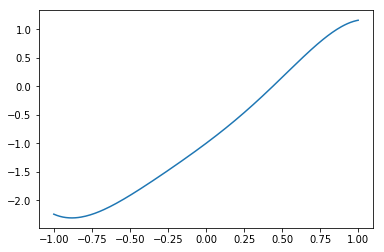

In [13]:
plt(X,f(X))

In [21]:
exact = object()
def bisection_method(f, a, b, tol, N):
    '''
    Solve root-finding problem f(x) = 0 over [a, b] using bisection method, with maximum N iterations and within tol precision.
    
    Bisection method start with the hypothesis that ``f(a) * f(b) < 0``, then takes the midpoint and assert again that statement
    until finding the closest zero.
    The method always finds a solution if the first hypothesis is satisified, but doesn't necessarily find all zeros.
    
    Parameters
    ==========
    f : function
        continuous function 
    a : real number
        lower bound for search interval
    b : real number
        upper bound for search interval
    tol : real number
        tolerance error
    N : integer
        maximum number of iterations
    
    Returns
    =======
    tuple (c, n, err) where c is the root, n the number of iterations, err the absolute error
    
    '''
    if f(a)*f(b)>0:
        raise ValueError('The function doesn\'t change sign at the endoints. Initial hypothesis not verified. Change interval of interest, or the function doesn\'t admit zeros')
    
    if f(a) == 0:
        return a, exact, 0
    if f(b) == 0:
        return b, exact, 0
         
    err = (b-a)/2
    k = 0
    fa = f(a)
    fb = f(b)
    while err >= tol and k <= N:
        x = (b+a)/2
        fx = f(x)
        if fx == 0:
            return x, exact, k
        elif fa * fx < 0:
            b = x
            fb = fx
        else:
            a = x
            fa = fx
            
        err = (b-a)/2
        
        if err < tol:
            return x, err, k
        k = k+1
        
    if k >= N+1:
        return None, None, k
        


In [22]:
bisection_method


<function __main__.bisection_method>

In [54]:
try:
    with open('existe_pas','r') as f:
        pass
except FileNotFoundError:
    # create the file and retry

FileNotFoundError: [Errno 2] No such file or directory: 'existe_pas'

In [57]:
None > 0

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [55]:
import pandas as pd
pd.read_csv('existe_pas')

FileNotFoundError: File b'existe_pas' does not exist

In [ ]:
def find_zero(f, a,b):
    # on essaye bisection
    # on essaye newton...
    # point fix....

In [53]:
try: 
    c, err, n = bisection_method(lambda x: x**2 +1, -1, 1, 1.e-5, 100)
    c, err, n
except ValueError:
    print("We did actually raise Valuerrror...let's move on")

We did actually raise Valuerrror...let's move on


In [30]:
c, err, n = bisection_method(lambda x: x**2 -1, -1, 1, 1.e-5, 100)
c, err, n

(-1, <object at 0x112bc2810>, 0)

In [44]:
c, err, n = bisection_method(lambda x: x**2 +10**8 *x +1, -10**9, -3, 1.e-2, 100)
c, err, n

(-100000000.01371646, 0.0072759538888931274, 35)

In [48]:
c, err, n = bisection_method(lambda x: x**2 +10**8 *x +1, -1, 1, 1.e-18, 100)
c, err, n
P = lambda x: x**2 +10**8 *x +1
P(c)

5.93891602562735e-12

In [51]:
root =  [-10**8/2 + 0.5 * np.sqrt(10**16 - 4), -10**8/2 -0.5* np.sqrt(10**16 - 4)]
root
P(root[0])

0.2549419403076172

In [32]:
c, err, n = bisection_method(lambda x: x**2 -2, -1, 3, 1.e-5, 10)
c, err, n

(None, None, 11)

In [16]:
res = bisection_method(f, -1, 1, 1.e-5, 10)

No convergence, need more iterations


In [17]:
res is None

True

# Assessments Exercise 1

Test 1: respect guidelines 

In [18]:
from types import FunctionType

In [19]:
assert isinstance(bisection_method, FunctionType), 'No function bisection_method defined'

In [20]:
bisection_method.__doc__

'\n    Solve root-finding problem using bisection method\n    \n    paragraph with more detail\n    Hypothesis ``f(a) * f(b) < 0``\n    \n    Parameters\n    ==========\n    f : function\n        continuous function \n    a : real number\n        lower bound for search interval\n    b : real number\n        upper bound for search interval\n    tol : real number\n        tolerance error\n    N : integer\n        maximum number of iterations\n    \n    Returns\n    =======\n    tuple (c, n, err) where c is the root, n the number of iterations, err the absolute error\n    \n    '

In [21]:
assert len(bisection_method.__doc__) > 0, 'No documentation'

In [22]:
assert 'input' in bisection_method.__doc__.lower(), 'No input'

AssertionError: No input

In [23]:
assert 'output' in bisection_method.__doc__.lower(), 'No output'

AssertionError: No output

In [24]:
bisection_method(f=f, a=-1, b=1, tol=1.e-5, N=100)
# test the students have used appropriate parameters

Convergence in 16 steps


(0.4385528564453125, 7.62939453125e-06, 16)

In [25]:
bisection_method(f, -1, 1, N=100, tol=1.e-5)

Convergence in 16 steps


(0.4385528564453125, 7.62939453125e-06, 16)

In [26]:
c, err, n = bisection_method(f, -1, 1, 1.e-5, 100)
assert c == 0.4385528564453125 

Convergence in 16 steps


In [27]:
assert err < 1.e-5

In [28]:
assert 15 <= n <=17

In [29]:
import inspect 

In [30]:
assert "break" in inspect.getsource(bisection_method)

AssertionError: 

# Exercise 2: Fixed-point iteration

In [41]:
def fixed_point_iteration(g, x_0, tol, N):
    '''
    solve the fixed point problem g(x) = x iteratively
    
    Further details
    
    Parameters
    ==========
    g : function
        continuous function
    x_0 : real number
        initial guess
    tol : real number
        error tolerance
    N : integer
        maximum number of iterations
        
    Returns
    =======
    tuple (c, n, err) where c is the root, n the number of iterations and err the absolute error
    
    '''
    err = 1
    k = 0
    x = x_0
    
    while err >= tol and k <= N:
        c = g(x)
        err = abs(c-x)
        if err < tol:
            c = x
            n = k
            print('The fixed-point iteration converged in', n, 'steps')
            return c, n, err
        k = k+1
        x = c
    if k == N:
        n = k
        print('The fixed-point iteration did not converge !')

        

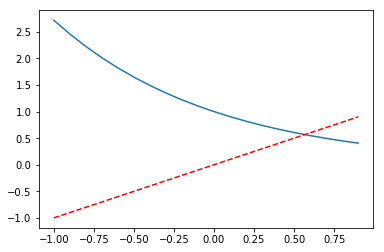

In [40]:
g = lambda x: exp(-x)
xx  = np.arange(-1, 1, 0.1)
plt(xx, g(xx))
plt(xx, xx, 'r--')

In [29]:
fixed_point_iteration(g, 1, 1.e-10, 100)

The fixed-point iteration converged in 40 steps


(0.567143290462223, 40, 8.2179596461173787e-11)

# Assessments Exercise 2

In [30]:
assert len( fixed_point_iteration.__doc__ ) > 0

In [31]:
import sympy
from sympy.solvers import solve
from sympy import Symbol
from sympy import exp as expo

In [32]:
x = Symbol('x')
solution = solve(expo(-x)-x, x)

In [34]:
lw = solution[0]
exact_solution = lw.evalf(16)

In [37]:
result = fixed_point_iteration(g, 1, 1.e-10, 100)
assert abs( exact_solution - result[0] ) < 1.e-10

The fixed-point iteration converged in 40 steps


# Exercise 3: Newton's method

In [67]:
def newtons_method(f, fp, x_0, tol, N=100):
    '''
    '''
    k=0
    err = 1
    x = x_0
    while k<N and err > tol:
        c = x - f(x)/fp(x)
        err = abs(x-c)
        n = k
        if err < tol:
            print("Newton's method converged in ", k, " steps")
            return c, n, err
        k = k+1
        x = c
    if k == N:
        print("Newton's method did not converge !")
    

In [68]:
from numpy import arctan, arctan2


In [69]:
h = lambda x: arctan(x) -1
hp = lambda x: 1/(1 + x**2)

In [70]:
newtons_method(h, hp, 2, 1.e-8)

Newton's method converged in  4  steps


(1.5574077246549023, 4, 2.1656232362943229e-11)

# Assessments Exercise 3

In [73]:
assert len(newtons_method.__doc__.strip()) > 0

AssertionError: 

In [83]:
c, n, err = newtons_method(h, hp, 2, 1.e-8)
from sympy import atan
sol = solve(atan(x)-1, x)[0].evalf(16)
assert abs(sol - c) < 1.e-20

Newton's method converged in  4  steps


AssertionError: 

In [88]:
result = newtons_method(h, hp, 2, 1.e-80, 2)
assert result is None

Newton's method did not converge !
